## fancy indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
# suppose we want to access three different elements 
# we could do it like this
[x[3], x[6], x[2]]

[71, 82, 14]

In [3]:
# Alternatively, we can pass a sigle list or array of indices to obtain the same result
index = [3,6,2]
x[index]

array([71, 82, 14])

In [4]:
# using fancy indexing
# the shape fo the result reflects the shape of the index arrays 
index =np.array([[3,4],
                 [5,1]])
print(x[index])

[[71 60]
 [20 92]]


In [5]:
# multiple dimensions  also works
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([2,2,1])
col = np.array([1,3,2])
print(x[row,col]) # Equivalently [x[2,1],x[2,3],x[1,2]


[ 9 11  6]


In [7]:
print(x[row[:,np.newaxis], col])


[[ 9 11 10]
 [ 9 11 10]
 [ 5  7  6]]


In [8]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
x[2, [2,0,1]]

array([10,  8,  9])

In [10]:
x[1:,[2, 0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
mask = np.array([1,0,1,0],dtype=bool)
# print(x[row[:,np.newaxis]])
print(row[:,np.newaxis],mask)
print(x[row[:,np.newaxis],mask])

[[2]
 [2]
 [1]] [ True False  True False]
[[ 8 10]
 [ 8 10]
 [ 4  6]]


### example: selecting random points

In [43]:
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean, cov,100)
print(X.shape)
print(X)

(100, 2)
[[ 5.86501323e-01  2.65750974e+00]
 [ 8.91568728e-02 -4.10108912e-01]
 [ 1.08760627e+00  1.12826476e+00]
 [ 5.96401368e-01  1.15404786e+00]
 [ 9.97906065e-01  2.35994742e+00]
 [-3.55226165e-01 -1.08865240e+00]
 [-3.03399728e-01 -1.60611376e+00]
 [-9.73621269e-01 -2.21867838e+00]
 [-2.35151244e+00 -3.06392323e+00]
 [ 5.98644067e-01  9.80839233e-01]
 [-4.67325254e-04  6.43655246e-01]
 [-9.75217525e-01 -3.06097819e+00]
 [-3.00206653e-01 -8.71889611e-01]
 [-1.14870280e+00 -1.13938864e+00]
 [ 8.61065030e-01  2.71343135e-01]
 [-3.68613042e-01 -1.79122424e+00]
 [-1.68961962e-01  4.43965779e-01]
 [-2.35830450e-01 -6.79446032e-01]
 [ 1.64178663e+00  8.24801146e-01]
 [-5.48363884e-01 -1.59766047e+00]
 [-1.55045915e+00 -3.31231706e+00]
 [ 9.16611489e-02  1.37606145e+00]
 [-9.79685051e-01 -2.60224726e+00]
 [-8.90276868e-01 -2.75037960e+00]
 [-3.66163830e-01 -2.65509702e-01]
 [-9.62889757e-01 -1.65189111e+00]
 [-1.11204807e-01  9.15337643e-01]
 [ 3.32713201e-01  1.87329944e-01]
 [-2.302599

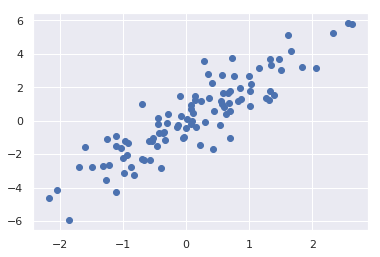

In [38]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(X[:,0], X[:,1])
plt.show()

In [54]:
# 根据X的维度shape[0], 从中选取20个点， replace不重复
indices = np.random.choice(X.shape[0], 20, replace=False)
print(indices)
# print(indices.shape)
selection = X[indices]  # equivalently, x[indices,:]

print(selection)


[36 86 46 68 15 10 78 66  9 18  3 70 48 22 58 21 89 79 88  5]
[[ 6.12144957e-01  2.39564383e+00]
 [ 1.08614243e+00  9.11187425e-01]
 [-1.04254340e+00 -2.61136765e+00]
 [ 2.88205360e-01  1.24442949e+00]
 [-3.68613042e-01 -1.79122424e+00]
 [-4.67325254e-04  6.43655246e-01]
 [-5.54300049e-01  5.06902256e-01]
 [ 1.76499513e+00  4.64664137e+00]
 [ 5.98644067e-01  9.80839233e-01]
 [ 1.64178663e+00  8.24801146e-01]
 [ 5.96401368e-01  1.15404786e+00]
 [-3.71029882e-02  2.00210455e+00]
 [-3.43721564e-02 -2.39157870e-01]
 [-9.79685051e-01 -2.60224726e+00]
 [ 6.08852603e-01  7.07006190e-01]
 [ 9.16611489e-02  1.37606145e+00]
 [ 1.57067982e+00  2.57734661e+00]
 [-2.35308682e+00 -5.27269258e+00]
 [-2.26197823e+00 -3.46507695e+00]
 [-3.55226165e-01 -1.08865240e+00]]


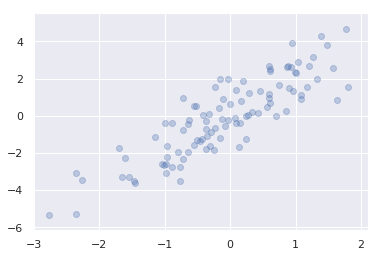

In [70]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);
plt.show()
# plt.scatter?

### modifying values with fancy indexing

In [72]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)
x[i] -= 10
print(x)

[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


In [75]:
# 重复的索引操作可能带来意想不到的结果

x = np.zeros(10)
print(x[[0, 0]])
x[[0,0]] = [4, 6] # expected [4,6,0,0,0,..]
print(x) # result [6, 0,0 ..]
# the reason is that, to first assign x[0]=4,followed by x[0]=6


[0. 0.]
[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [77]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1 # expected [6, 0, 1, 2, 3, 0..]
x  # result  array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])
# it is not the augmentation that happens multiple times

array([6., 0., 2., 2., 2., 0., 0., 0., 0., 0.])

In [79]:
i = [2, 3, 3, 4, 4, 4]
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


### example: binning data

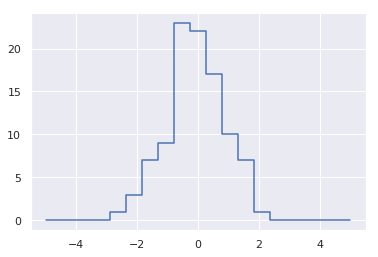

In [106]:
np.random.seed(42)
x = np.random.randn(100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
# print(bins)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)# ;print(i) 找出x中的所有元素在直方图中的位置
np.add.at(counts, i, 1)
plt.plot(bins, counts, linestyle='steps')
# plt.hist(x, bins, histtype='step')
plt.show()

In [108]:

print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
### 两种方法等价
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
18.7 µs ± 582 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Custom routine:
9.88 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [112]:
# numpy 内置的直方图画法更适用与大数据

x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
58.4 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
81.2 ms ± 4.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
